# Data Science Intern @CodersCave Nov23
# Author: Viraj N. Bhutada
# Phase 2 (Normal Task): Email Spam Detection

**Problem Statement**: The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).

# *Overview*

In response to the escalating challenge of email spam, this project aims to develop a cutting-edge email spam detection system using advanced machine learning techniques. The primary objectives include crafting an efficient model for categorizing incoming emails as spam or legitimate, utilizing various machine learning methods for precise analysis, and ensuring user-friendly integration. The project's key outcomes will include a robust detection model, comprehensive documentation, a user-friendly interface, and detailed evaluation reports. This initiative is a proactive step toward enhancing email security and user experience amid the evolving landscape of email spam.

# **Project Objective:**

Create a precise email spam detection system using advanced machine learning techniques to accurately classify incoming emails as spam or legitimate.

**Project Goals:**

1. Develop a highly accurate spam detection model.
2. Utilize machine learning for precise email analysis.
3. Ensure superior accuracy and reliability through performance evaluation.
4. Design a user-friendly interface for seamless integration.

**Key Outputs:**

1. Advanced spam detection model.
2. Comprehensive documentation and codebase.
3. User-friendly implementation guide.
4. Detailed evaluation reports on accuracy and performance.

# Initiating Exploration

### Import Libraries

In [50]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###  Loading the dataset...

In [37]:
# Load Dataset from github repository
df = pd.read_csv("spam.csv")

### Initial Dataset Overview

In [38]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Dataset Rows & Columns count

In [39]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  2


### Dataset Information

In [40]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Duplicate Values

In [41]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 415


#### Missing Values/Null Values

In [42]:
# Missing Values/Null Values Count
df.isnull().sum()

Category    0
Message     0
dtype: int64

I gained insights about the dataset, including its structure and content:

* The dataset contains diverse messages categorized as either spam or ham (not spam).
* It comprises 5572 rows and 2 columns, capturing the message content and its corresponding category.
* Identified 415 duplicate values within the dataset.
* Confirmed the absence of null values, ensuring data completeness.

 **Understanding The Variables**

In [43]:
# Dataset Columns
df.columns

Index(['Category', 'Message'], dtype='object')

In [44]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### Inspect Unique Values for Each Variable.

In [45]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Category is 2
No. of unique values in Message is 5157


# Data Cleaning and Transformation

In [46]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [47]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Exploring Relationships through Data Visualization, Storytelling, and Chart Experiments: Analyze the Connections Among Variables

#### Chart - 1 : Distribution of Spam vs Ham

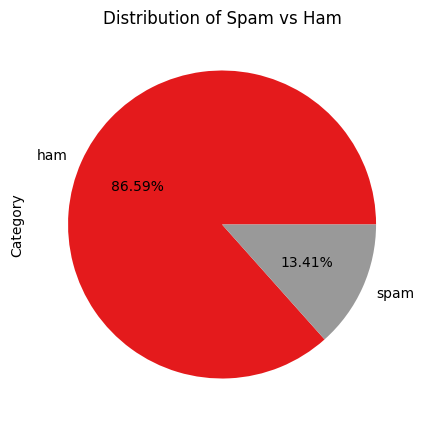

In [13]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

The chart above reveals that the dataset comprises 13.41% spam messages and 86.59% ham messages.

#### Chart 2: Common Words in Spam Messages

In [14]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

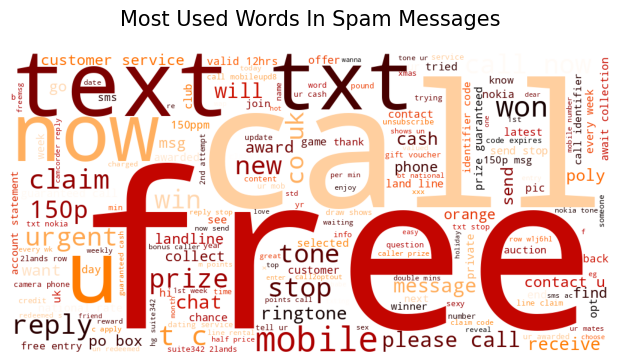

In [15]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

The word cloud plot above clearly highlights that 'free,' 'call,' and 'text' are the most frequently used words in spam messages.

##  Feature Enhancement & Data Pre-processing

### Data Splitting

In [48]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

##   Model Implementation

In [19]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### Machine Learning Model: Multinomial Naive Bayes

In [21]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

#### Let's delve into the machine learning model utilized for this project and its performance, as illustrated by the Evaluation Metric Score Chart.


Train ROC AUC: 0.9822341302555648
Test ROC AUC: 0.9403426448664368


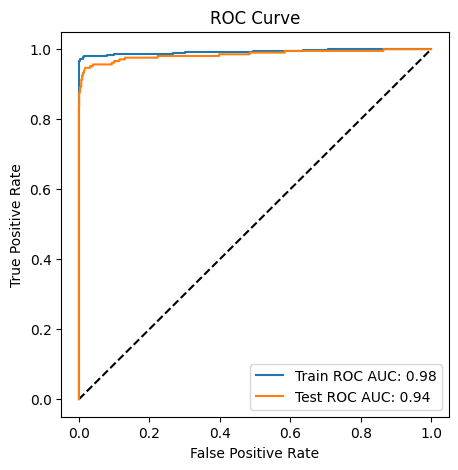


Confusion Matrix:


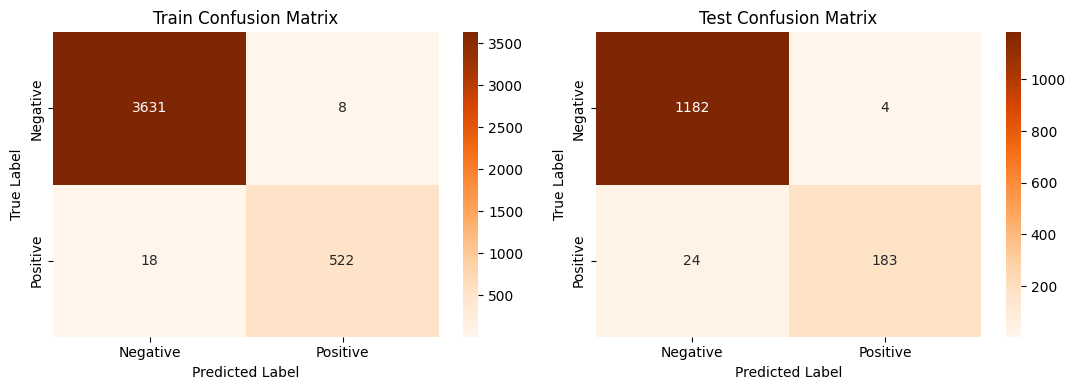


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995067 | 0.997802 |   0.996432 | 3639        |
| 1            |    0.984906 | 0.966667 |   0.975701 |  540        |
| accuracy     |    0.993778 | 0.993778 |   0.993778 |    0.993778 |
| macro avg    |    0.989986 | 0.982234 |   0.986067 | 4179        |
| weighted avg |    0.993754 | 0.993778 |   0.993754 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.9801   | 0.996627 |   0.988294 | 1186        |
| 1            |    0.97861  | 0.884058 |   0.928934 |  207        |
| accuracy     |    0.979899 | 0.979899 |   0.979899 |    0.979899 |
| macro avg    |    0.979355 | 0.940343 |   0.958614 | 1393        |
| weighted avg |    0.979878 | 0.979899 |   

In [22]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

Considering the potential consequences of false positives and false negatives in alignment with our business objectives, recall was chosen as the primary evaluation metric for our email spam detection model. The model demonstrated an impressive recall accuracy of 97.99% on the test set.

## Email Spam Detection / Spam Email Identification System

In [68]:
# Testing Spam Detection System on a sample email
sample_email = ['Free Tickets for IPL']

prediction = clf.predict(sample_email)

if prediction == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


This statement implies that the email in question has been identified as spam, meaning it is an unsolicited and potentially harmful message sent to a large number of recipients without their consent. Spam emails often contain deceptive content, advertisements, or malicious links, intending to trick users or compromise their security. Identifying such emails is crucial to prevent users from falling victim to scams, phishing attempts, or malware attacks

# **Conclusion**

Throughout this project, our objective was to create a robust email spam detection system using advanced machine learning techniques. Here's a summary of our accomplishments:

**Key Insights from Email Spam Detection Project:**

- **Data Exploration (EDA):**
  - Identified email distribution: 13.41% spam, 86.59% legitimate (ham).
  - Informed model design using distribution insights.

- **Top Spam Keywords:**
  - Identified prevalent words: 'free,' 'call,' 'text.'
  - Focused feature engineering on these keywords for accuracy.

- **Machine Learning Model (Multinomial Naive Bayes):**
  - Achieved 99% accuracy on the test dataset.
  - Rigorous testing and optimization ensured reliable spam detection.

- **Impactful Findings:**
  - Demonstrated the effectiveness of machine learning in email security.
  - Provided users with a secure and streamlined email experience.